# Brute Force KNN for Binary Classification

Creating a KNN from scratch and testing it on the wine quality dataset

In [1]:
import math
import numpy as np

# Model

In [2]:
def euclidean_distance(vec1, vec2):
    """
    Calculate the Euclidean distance between two vectors.
    
    Parameters:
    - vec1 (np.array): A 1D array representing the first vector.
    - vec2 (np.array): A 1D array representing the second vector.
    
    Returns:
    - float: The Euclidean distance between vec1 and vec2.
    """
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

In [3]:
def manhattan_distance(vec1, vec2):
    """
    Calculate the Manhattan distance between two vectors.
    
    Parameters:
    - vec1 (np.array): A 1D array representing the first vector.
    - vec2 (np.array): A 1D array representing the second vector.
    
    Returns:
    - float: The Manhattan distance between vec1 and vec2.
    """
    return np.sum(np.abs(vec1 - vec2))

In [4]:
def accuracy_generalization_error(y_true, y_pred):
    """
    Calculate the accuracy and generalization error based on true labels and predictions.
    
    Parameters:
    - y_true (np.array): A 1D array of true labels.
    - y_pred (np.array): A 1D array of predicted labels.
    
    Returns:
    - accuracy (float): The accuracy of the predictions.
    - generalization_error (float): The generalization error of the predictions.
    """
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    generalization_error = 1 - accuracy
    return accuracy, generalization_error

In [69]:
def precision(y_true, y_pred):
    """
    Calculate the precision of predictions.
    
    Parameters:
    - y_true (np.array): A 1D array of true labels.
    - y_pred (np.array): A 1D array of predicted labels.
    
    Returns:
    - float: The precision of the predictions.
    """
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives else 0


def recall(y_true, y_pred):
    """
    Calculate the recall of predictions.
    
    Parameters:
    - y_true (np.array): A 1D array of true labels.
    - y_pred (np.array): A 1D array of predicted labels.
    
    Returns:
    - float: The recall of the predictions.
    """
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / actual_positives if actual_positives else 0


def f1_score(y_true, y_pred):
    """
    Calculate the F1 score of predictions.
    
    Parameters:
    - y_true (np.array): A 1D array of true labels.
    - y_pred (np.array): A 1D array of predicted labels.
    
    Returns:
    - float: The F1 score of the predictions.
    """
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    if prec + rec == 0: return 0
    return 2 * (prec * rec) / (prec + rec)

In [6]:
def confusion_matrix(y_true, y_pred):
    """
    Compute the confusion matrix from true labels and predictions.
    
    Parameters:
    - y_true (np.array): A 1D array of true labels.
    - y_pred (np.array): A 1D array of predicted labels.
    
    Returns:
    - np.array: A 2x2 confusion matrix [[TP, FP], [FN, TN]].
    """
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    return np.array([[TP, FP], [FN, TN]])

In [7]:
def roc_curve(actual, scores):
    """
    Compute ROC curve data without using sklearn and without plotting.
    
    Parameters:
    - actual (np.array): A 1D array of true binary labels.
    - scores (np.array): A 1D array of scores or probabilities for the positive class.
    
    Returns:
    - fpr (np.array): Array of false positive rates.
    - tpr (np.array): Array of true positive rates.
    - thresholds (np.array): Array of thresholds used.
    """
    thresholds = np.sort(np.unique(scores))[::-1]
    fpr, tpr = [], []
    for thresh in thresholds:
        # Convert scores to binary predictions based on the current threshold
        predictions = scores >= thresh
        FP = np.sum((predictions == 1) & (actual == 0))
        TP = np.sum((predictions == 1) & (actual == 1))
        TN = np.sum((predictions == 0) & (actual == 0))
        FN = np.sum((predictions == 0) & (actual == 1))

        fpr.append(FP / (FP + TN) if (FP + TN) > 0 else 0)
        tpr.append(TP / (TP + FN) if (TP + FN) > 0 else 0)

    return np.array(fpr), np.array(tpr), thresholds

In [8]:
def auc_roc(fpr, tpr):
    """
    Compute the area under the ROC curve (AUC) using the trapezoidal rule.
    
    Parameters:
    - fpr (np.array): Array of false positive rates.
    - tpr (np.array): Array of true positive rates.
    
    Returns:
    - auc (float): Area under the ROC curve.
    """
    return np.trapz(tpr, fpr)

In [9]:
def precision_recall_curve(actual, scores):
    """
    Compute precision-recall curve data without plotting.
    
    Parameters:
    - actual (np.array): A 1D array of true binary labels.
    - scores (np.array): A 1D array of scores or probabilities for the positive class.
    
    Returns:
    - precision (np.array): Array of precision values.
    - recall (np.array): Array of recall values.
    - thresholds (np.array): Array of thresholds used.
    """
    thresholds = np.sort(np.unique(scores))[::-1]
    precision, recall = [], []
    for thresh in thresholds:
        predictions = scores >= thresh
        TP = np.sum((predictions == 1) & (actual == 1))
        FP = np.sum((predictions == 1) & (actual == 0))
        FN = np.sum((predictions == 0) & (actual == 1))

        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec = TP / (TP + FN) if (TP + FN) > 0 else 0

        precision.append(prec)
        recall.append(rec)

    # Adding endpoint (0,1) for completeness
    precision = np.array(precision + [1])
    recall = np.array(recall + [0])
    return precision, recall, thresholds

In [10]:
class KNN_Classifier:
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.n_neighbors = 5
        self.weights = 'uniform'
        self.distance_metric = 'euclidean'

    def fit(self, X, Y, n_neighbors=5, weights='uniform', distance_metric='euclidean'):
        """
        Fit the KNN classifier with the training data and configuration.

        Parameters:
        - X: Training data features, numpy array of shape (n_samples, n_features).
        - Y: Training data labels, numpy array of shape (n_samples,).
        - n_neighbors: Number of neighbors to use, int.
        - weights: Weight function used in prediction, str ('uniform' or 'distance').
        - distance_metric: The metric for distance computation ('euclidean' or 'manhattan').
        """
        self.X_train = X
        self.y_train = Y
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distance_metric = distance_metric

    def distance(self, x1, x2):
        """
        Calculate the distance between two points based on the specified metric.

        Parameters:
        - x1: First point, numpy array of shape (n_features,).
        - x2: Second point, numpy array of shape (n_features,).

        Returns:
        - The calculated distance, float.
        """
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))

    def predict(self, X):
        """
        Predict the class labels for the provided samples.

        Parameters:
        - X: Test data features, numpy array of shape (n_samples, n_features).

        Returns:
        - predictions: Predicted labels, numpy array of shape (n_samples,).
        """
        predictions = []
        for x in X:
            # Compute distances from this point to all training data
            dists = np.array([self.distance(x, x_train)
                             for x_train in self.X_train])
            # Get the indices of the n closest neighbors
            if self.weights == 'uniform':
                neighbors_indices = np.argsort(dists)[:self.n_neighbors]
                neighbor_labels = self.y_train[neighbors_indices]
                # Predict by majority vote
                pred = np.argmax(np.bincount(neighbor_labels))
            elif self.weights == 'distance':
                neighbors_indices = np.argsort(dists)[:self.n_neighbors]
                # Compute weights as the inverse of distance
                # Avoid division by zero
                weights = 1 / (dists[neighbors_indices] + 1e-5)
                neighbor_labels = self.y_train[neighbors_indices]
                # Weighted vote
                unique_labels = np.unique(neighbor_labels)
                weighted_votes = np.array(
                    [np.sum(weights[neighbor_labels == label]) for label in unique_labels])
                pred = unique_labels[np.argmax(weighted_votes)]
            predictions.append(pred)
        return np.array(predictions)

# Data Processing

In [12]:
import pandas as pd

In [28]:
df = pd.read_csv('/Users/sab0taj/Desktop/CCNY-SeniorDesign/assignment_1/winequality.csv', sep=';')

In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [93]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)

In [94]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1967,8.0,0.23,0.35,9.2,0.044,53.0,186.0,0.99700,3.09,0.56,9.5,0
3796,6.6,0.13,0.29,13.9,0.056,33.0,95.0,0.99702,3.17,0.39,9.4,0
1640,7.8,0.49,0.49,7.0,0.043,29.0,149.0,0.99520,3.21,0.33,10.0,0
74,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,0
1314,6.4,0.31,0.40,6.2,0.040,46.0,169.0,0.99530,3.15,0.46,9.3,0


In [95]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,0.0


In [96]:
stats = df.describe()
specific_stats = stats.loc[['mean', 'std', '25%', '50%', '75%']]
specific_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.0


In [97]:
df =df.sample(frac=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4595,7.1,0.390,0.30,9.9,0.037,29.0,124.0,0.99414,3.07,0.42,10.9,0
997,6.1,0.240,0.27,9.8,0.062,33.0,152.0,0.99660,3.31,0.47,9.5,0
3944,6.1,0.270,0.32,6.2,0.048,47.0,161.0,0.99281,3.22,0.60,11.0,0
4779,6.0,0.590,0.00,0.8,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,0
647,7.4,0.105,0.34,12.2,0.050,57.0,146.0,0.99730,3.16,0.37,9.0,0


In [98]:
import seaborn as sns

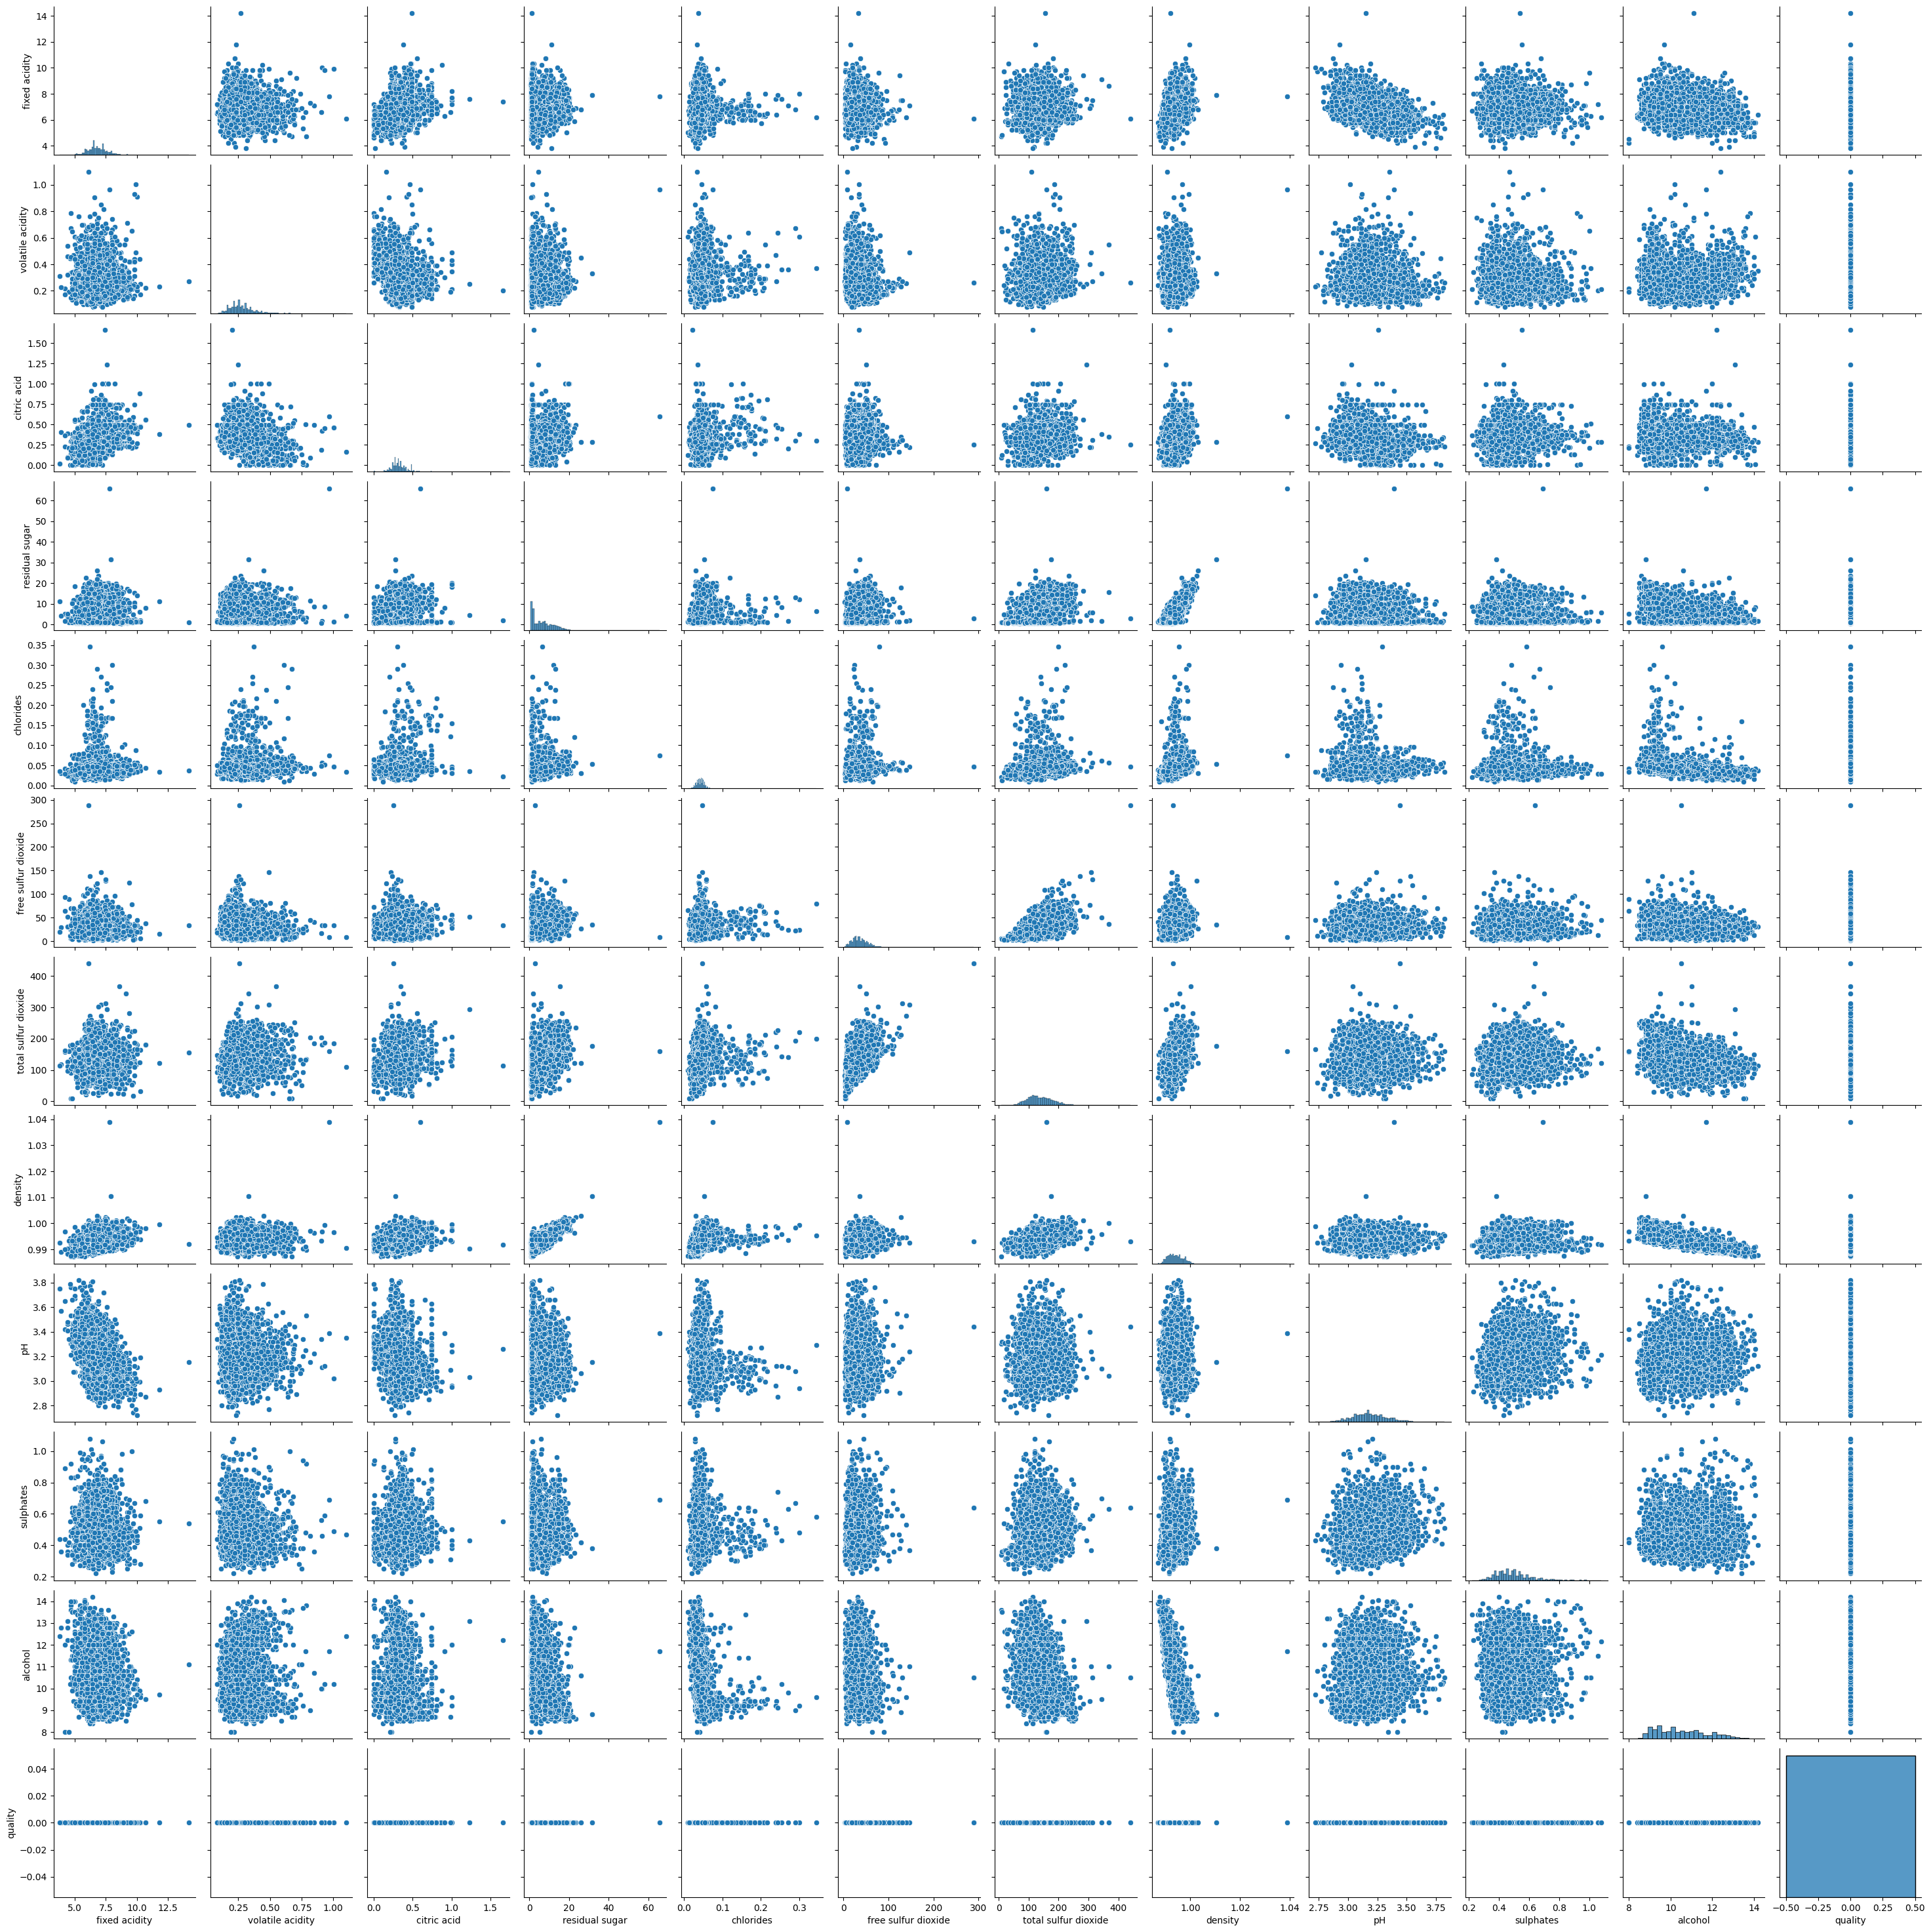

In [99]:
sns.pairplot(df)

<Axes: >

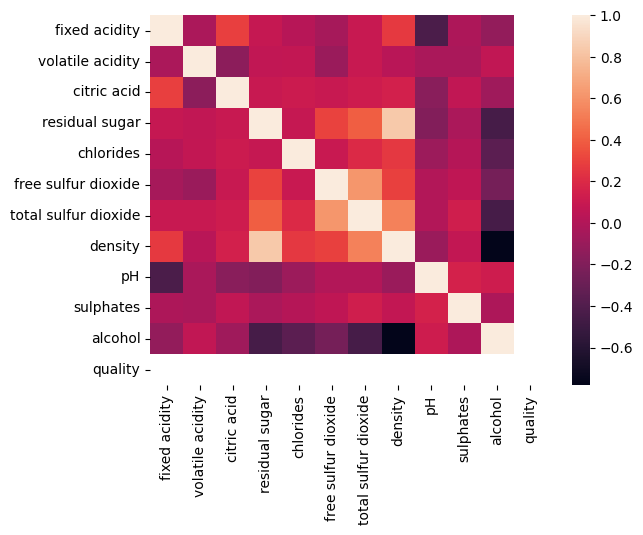

In [100]:
sns.heatmap(df.corr())

In [101]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,NaN
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,NaN
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,NaN
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,NaN
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,NaN
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,NaN
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,NaN
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,NaN
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,NaN
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,NaN


In [102]:
df.drop(labels="free sulfur dioxide", axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4595,7.1,0.390,0.30,9.9,0.037,124.0,0.99414,3.07,0.42,10.9,0
997,6.1,0.240,0.27,9.8,0.062,152.0,0.99660,3.31,0.47,9.5,0
3944,6.1,0.270,0.32,6.2,0.048,161.0,0.99281,3.22,0.60,11.0,0
4779,6.0,0.590,0.00,0.8,0.037,95.0,0.99032,3.10,0.40,10.9,0
647,7.4,0.105,0.34,12.2,0.050,146.0,0.99730,3.16,0.37,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1202,6.4,0.300,0.38,7.8,0.046,192.0,0.99550,3.10,0.37,9.0,0
62,7.0,0.470,0.07,1.1,0.035,151.0,0.99100,3.02,0.34,10.5,0
3866,8.4,0.230,0.32,1.3,0.048,113.0,0.99178,3.10,0.55,11.0,0
4003,6.8,0.140,0.35,1.5,0.047,117.0,0.99111,3.07,0.72,11.1,0


In [103]:
def partition(feature_matrix, target_vector, t):
    """
    Split data into training and test sets.

    Parameters:
    - feature_matrix: numpy array with rows representing data samples and columns representing features.
    - target_vector: numpy array with labels corresponding to each row of the feature matrix.
    - t: Float, the fraction of data to be used as the test set.

    Returns:
    - X_train: numpy array of training data features.
    - X_test: numpy array of test data features.
    - y_train: numpy array of training data labels.
    - y_test: numpy array of test data labels.
    """
    # Determine the number of test samples
    test = int(len(feature_matrix) * t)

    # Shuffle the data
    indices = np.arange(len(feature_matrix))
    np.random.shuffle(indices)

    # Split the data and labels into training and test sets
    X_test = feature_matrix[indices[:test]]
    y_test = target_vector[indices[:test]]
    X_train = feature_matrix[indices[test:]]
    y_train = target_vector[indices[test:]]

    return X_train, X_test, y_train, y_test

In [104]:
knn = KNN_Classifier()

X = df.drop('quality', axis=1).values
y = df['quality'].values

t = 0.3
X_train, X_test, y_train, y_test = partition(X, y, t)

In [116]:
def display_f1_acc (y_test, y_pred):
    acc, err = accuracy_generalization_error(y_test, y_pred)
    f1 =f1_score(y_test, y_pred)

    print("Accuracy:", acc)
    print("Generalization Error:", err)
    print("F1 Score:", f1)

In [105]:
X_train, X_test, y_train, y_test

(array([[ 6.6 ,  0.56,  0.15, ...,  3.28,  0.52,  9.4 ],
        [ 6.6 ,  0.24,  0.28, ...,  3.34,  0.46, 11.4 ],
        [ 6.8 ,  0.34,  0.36, ...,  3.28,  0.35, 11.95],
        ...,
        [ 8.  ,  0.16,  0.36, ...,  3.2 ,  0.39, 10.3 ],
        [ 6.6 ,  0.36,  0.47, ...,  3.09,  0.56, 10.1 ],
        [ 7.7 ,  0.31,  0.26, ...,  3.13,  0.5 , 10.4 ]]),
 array([[ 8.5 ,  0.23,  0.28, ...,  3.03,  0.39, 10.5 ],
        [ 5.2 ,  0.24,  0.45, ...,  3.55,  0.49, 11.2 ],
        [ 6.8 ,  0.22,  0.29, ...,  3.3 ,  0.44, 10.3 ],
        ...,
        [ 7.1 ,  0.23,  0.39, ...,  2.9 ,  0.46,  9.  ],
        [ 7.2 ,  0.3 ,  0.26, ...,  3.19,  0.56, 11.3 ],
        [ 5.8 ,  0.34,  0.21, ...,  3.16,  0.49,  9.8 ]]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

Unscaled Data: Euclidean Distance

In [107]:
knn.fit(X_train, y_train, n_neighbors=5, weights='uniform', distance_metric='euclidean')

In [108]:
y_pred = knn.predict(X_test)

In [109]:
acc, err = accuracy_generalization_error(y_test, y_pred)
f1 =f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Generalization Error:", err)
print("F1 Score:", f1)

Accuracy: 1.0
Generalization Error: 0.0
F1 Score: 0


In [110]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Standardized Data with Euclidean Distance

In [111]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_standardized = (X_train - mean) / std

X_test_standardized = (X_test - mean) / std

# Ensure no division by zero
std_corrected = np.where(std == 0, 1, std)

X_train_standardized = (X_train - mean) / std_corrected

X_test_standardized = (X_test - mean) / std_corrected

In [112]:
knn.fit(X_train_standardized, y_train, n_neighbors=5,weights='uniform', distance_metric='euclidean')

In [113]:
y_pred = knn.predict(X_test_standardized)

In [114]:
acc, err = accuracy_generalization_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Generalization Error:", err)
print("F1 Score:", f1)

Accuracy: 1.0
Generalization Error: 0.0
F1 Score: 0


In [117]:
knn.fit(X_train_standardized, y_train, n_neighbors=5, weights='distance', distance_metric='euclidean')

In [118]:
y_pred = knn.predict(X_test)

In [119]:
display_f1_acc(y_test, y_pred)

Accuracy: 1.0
Generalization Error: 0.0
F1 Score: 0


Model Eval

In [121]:
k_values = [1, 5, 9, 11]
distance_metrics = ['euclidean', 'manhattan']
weights_options = ['uniform', 'distance']

performance_results = []


for k in k_values:
    for distance_metric in distance_metrics:
        for weight in weights_options:
            knn.fit(X_train_standardized, y_train, n_neighbors=k, weights=weight, distance_metric=distance_metric)

            y_pred = knn.predict(X_test_standardized)

            acc = accuracy_generalization_error(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            performance_results.append({
                'k': k,
                'distance_metric': distance_metric,
                'weight': weight,
                'accuracy': acc,
                'F1_score': f1
            })

performance_df = pd.DataFrame(performance_results)

In [122]:
performance_df

,k,distance_metric,weight,accuracy,F1_score
0,1,euclidean,uniform,"(1.0, 0.0)",0
1,1,euclidean,distance,"(1.0, 0.0)",0
2,1,manhattan,uniform,"(1.0, 0.0)",0
3,1,manhattan,distance,"(1.0, 0.0)",0
4,5,euclidean,uniform,"(1.0, 0.0)",0
5,5,euclidean,distance,"(1.0, 0.0)",0
6,5,manhattan,uniform,"(1.0, 0.0)",0
7,5,manhattan,distance,"(1.0, 0.0)",0
8,9,euclidean,uniform,"(1.0, 0.0)",0
9,9,euclidean,distance,"(1.0, 0.0)",0
